# Likes Report

By Victoria Smith
 
 ## Contents
1 Overview

1.1 Purpose
    
    1.2 Research Question
2 Data

3 Structure of the Data

    3.1 Identifying where the usable data is located
    3.2 Creating a list for accounts and timestamps
    3.3 JSON File "liked_posts.json" conversion DataFrame
4 Analysis

    4.1 Bar Plot
    4.2 Pie Plot
    4.3 Histogram
5 Findings

    5.1 Findings
6 Limitations & Conclusion
    
    6.1 Limitations
    6.2 Conclusions

## 1. Overview
### 1.1 Purpose
This report analyzes which instagram accounts user Victoriaa.00 likes the most.
### 1.2 Research Question
Whose posts does Victoriaa.00 like the most?
    
    This question is asked to gain insight on how everyday instagram users like Victoriaa.00 distrubute their likes on 
    Instagram.

## 2. Data
The data used in this report comes from Victoriaa.00's instgram profile, available for download through ["Privacy and Security"](https://www.instagram.com/accounts/privacy_and_security/) settings. File "liked_posts.json" was imported into a Python 3 enviorment.

Python Version:

In [109]:
from platform import python_version
print (python_version())

3.9.1


The required packages were used in this analysis:

In [110]:
import json
import pandas as ps
import seaborn as sb
import numpy as ny
from datetime import datetime as dt
from matplotlib import pyplot as plt

Data file loaded in:

In [111]:
with open (r'C:\Users\lemon\Documents\Data in Emerg\Instagram-Victoria00\likes\liked_posts.json') as ls:
    likes = json.load (ls)

## 3. Structure of the Data
How the data looks and what parts of the data will be used.

### 3.1 Identifying where the usable data is located:

In [112]:
likes.keys()

dict_keys(['likes_media_likes'])

In [113]:
type (likes['likes_media_likes'])

list

In [114]:
likes['likes_media_likes'][0]

{'title': 'n___j___f',
 'media_list_data': [],
 'string_list_data': [{'href': '',
   'value': 'ð\x9f\x91\x8d',
   'timestamp': 1612405353}]}

In [115]:
type (likes ['likes_media_likes'][0])

dict

In [116]:
likes['likes_media_likes'][0]['title']

'n___j___f'

In [117]:
likes ['likes_media_likes'][0]['string_list_data'][0]['timestamp']

1612405353

### 3.2 Creating a list for accounts and timestamps:
    Name of accounts and timestamps are the data being used.

In [118]:
accounts = [x['title']for x in likes ['likes_media_likes']]
accounts [:10]

['n___j___f',
 'realmacksanders',
 'aa.dvx',
 'mamady_kaba',
 'annetteopoku',
 'big_cs25',
 'big_cs25',
 'big_cs25',
 'flaminhotchido',
 'need4lspeed']

In [119]:
timestamp = [x['string_list_data'][0]['timestamp']for x in likes['likes_media_likes']]
timestamp[:10]

[1612405353,
 1612291446,
 1612286858,
 1612286810,
 1612155871,
 1612155579,
 1612155575,
 1612155565,
 1612129521,
 1612111299]

In [120]:
print(len(accounts),len(timestamp))

4407 4407


### 3.3 JSON File "liked_posts.json" was converted to a DataFrame and summarized by counting each like per account.

In [121]:
likes_df = ps.DataFrame ({'accounts': accounts, 'timestamp': timestamp})
likes_df.head()

,accounts,timestamp
0,n___j___f,1612405353
1,realmacksanders,1612291446
2,aa.dvx,1612286858
3,mamady_kaba,1612286810
4,annetteopoku,1612155871


In [122]:
count_likes = likes_df.groupby('accounts').count()
count_likes.head()

,timestamp
accounts,
0pyromania0,1
1.aob.x,1
1blckstar,1
1cleversha,3
1kdarryl,3


In [123]:
count_likes.sort_values('timestamp', ascending = False).head()

,timestamp
accounts,
jan9sanchez,82
just_vinny_,61
lil_lexy_,55
sir_percy_,50
annetteopoku,42


## 4. Analysis
Explanation/visuals of data sturcture and data types used from "liked_post.json"

### 4.1 Bar Plot
    Orangizes number of likes per account in a bar plot.

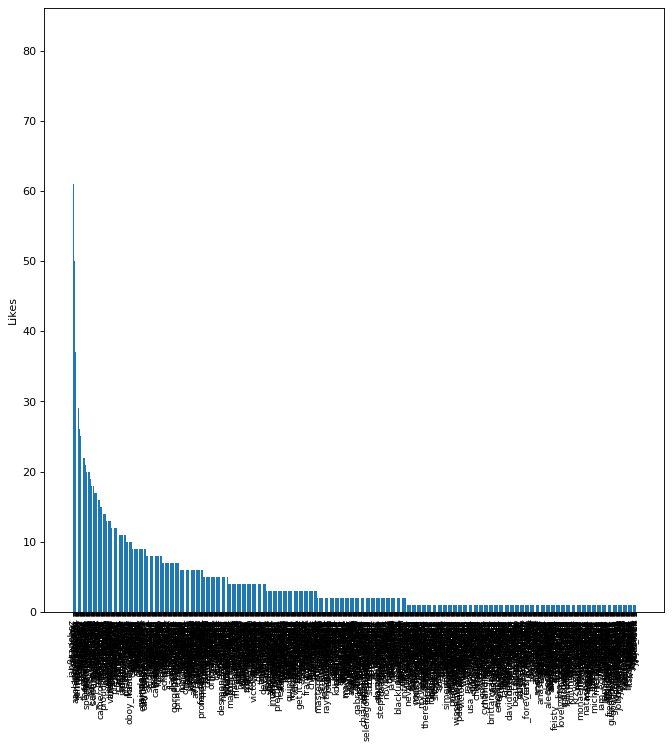

In [124]:
sortcount=count_likes.sort_values('timestamp', ascending=False)
labels = sortcount['timestamp'].keys()
vals = sortcount['timestamp']
width = .75

fig, ax = plt.subplots(figsize = (10,10), dpi = 80, facecolor  ='w', edgecolor = 'k')
ax.bar(labels,vals,width)
ax.set_ylabel('Likes')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

### 4.2 Pie Plot
    Organizes the number of likes per account in a pie plot.

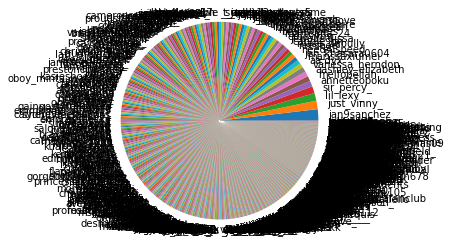

In [125]:
fig2, ax2 =  plt.subplots()
ax2.pie(vals, labels = labels)
ax2.axis ('equal')
plt.show()

Creating a more legible pie plot of the number of likes per account.

In [126]:
mostlikes = count_likes['timestamp'] > 40
countstop, countsbot = sortcount[mostlikes], sortcount[-mostlikes]
other = countsbot.sum()

piedat = countstop.append(ps.DataFrame(other['timestamp'],columns =['timestamp'],index = ['other < 40']))
piedat.head()

<ipython-input-126-9714c97384e0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  countstop, countsbot = sortcount[mostlikes], sortcount[-mostlikes]


,timestamp
jan9sanchez,82
just_vinny_,61
lil_lexy_,55
sir_percy_,50
annetteopoku,42


Displays accounts that have received more than 10 likes. Accounts that have received less than 10 likes are classified as "other < 10."

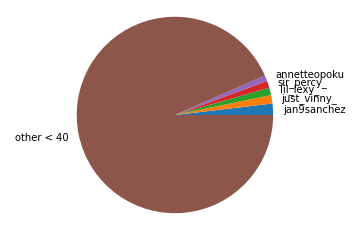

In [127]:
vals = piedat ['timestamp']
labels = piedat ['timestamp'].keys()

fig3, ax3 = plt.subplots()
ax3.pie (vals, labels = labels)
ax3.axis('equal')
plt.show()

### 4.3 Histogram
    Organizes data in a histogram based on likes per account

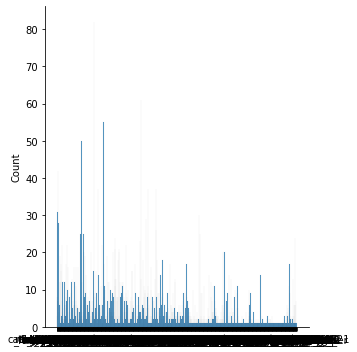

In [128]:
accountdist = sb.displot (accounts)

## 5. Findings

### 5.1 Findings
Instagram user Victoriaa.00 spends most likes on the following accounts:
1. jan9sanchez
2. just_vinny_
3. lil_lexy_
4. sir__piercy__
5. annetteopoku	

Each of these accounts are close friends or family members of Victoriaa.00.

All other accounts have received less than 40 likes from Victoriaa.00.

## 6 Limitations & Conclusion
### 6.1 Limitations 

Although, these top accounts are close friends or family members of Victoriaa.00 they could have more like than other account due to:
1. They post more than other users
2. Victoriaa.00 see their post more than other users.

### 6.2 Conclusion
Instagram user Victoriaa.00 distributes her likes mostly to family and friends. So it is safe to say that Victoriaa.00 "likes" majority of posts that come from family and friend. It is important to note the limitation of these likes mentioned in "5.1 Limitations."